In [12]:
import ROOT
from ROOT import TCanvas, TFile, TProfile, TNtuple, TH1I, TH1F, TH2F, TH3F, TColor, TEfficiency
from ROOT import gROOT, gBenchmark, gRandom, gSystem
import numpy as np
import pdb
from array import array

In [13]:
%cd /sphenix/u/egm2153/spring_2023
gROOT.LoadMacro("sPhenixStyle.C");
gROOT.ProcessLine("SetsPhenixStyle()")

/direct/sphenix+u/egm2153/spring_2023


0

sPhenixStyle: Applying nominal settings.
sPhenixStyle: ROOT6 mode


In [14]:
%cd /sphenix/user/egm2153/calib_study/detdeta/analysis/runs23727_23746

/gpfs/mnt/gpfs02/sphenix/user/egm2153/calib_study/detdeta/analysis/runs23727_23746


In [4]:
#runs = ['23727','23735','23737','23738','23739','23740','23743','23745']
cent = '0-5'
lowbound = {'0-5': 400, '5-10':300, '10-20':200, '20-30':100, '30-40':80, '40-50':60, '50-60':30}
highbound = {'0-5': 1300, '5-10':1200, '10-20':900, '20-30':700, '30-40':450, '40-50':350, '50-60':150}
starmean = {'0-5': 620, '5-10':515, '10-20':402, '20-30':279, '30-40':187, '40-50':118, '50-60':70}
phenixmean = {'0-5': 599, '5-10':498.7, '10-20':367.8, '20-30':248.5, '30-40':162.7, '40-50':101.1, '50-60':58.6}
staruncert = {'0-5': 33, '5-10':28, '10-20':21, '20-30':15, '30-40':10, '40-50':6, '50-60':4}
phenixuncert = {'0-5': 24.7, '5-10':28.9, '10-20':23.1, '20-30':17.5, '30-40':13.5, '40-50':9.8, '50-60':7.4}

f1 = ROOT.TFile.Open("MC/dETdeta_analysis_allruns_hijing_run14_nozs_mc_reweight_"+cent+"_reweight_hijing.root")
h_eT_truth = TH1F(f1.Get("hetdeta_ihcalbin"))
h_eT_truth_ihcalbin = TH1F(f1.Get("hetdeta_ihcalbin"))
h_eT_truth_ohcalbin = TH1F(f1.Get("hetdeta_ohcalbin"))
h_eT_truth_calobin = TH1F(f1.Get("hetdeta_calobin"))
h_eT_sim_emcal = TH1F(f1.Get("h_eT_emcal"))
h_eT_sim_ihcal = TH1F(f1.Get("h_eT_ihcal"))
h_eT_sim_ohcal = TH1F(f1.Get("h_eT_ohcal"))
h_eT_sim_calo = TH1F(f1.Get("h_eT_calo"))
h_eT_truth.SetDirectory(0)
h_eT_truth_ihcalbin.SetDirectory(0)
h_eT_truth_ohcalbin.SetDirectory(0)
h_eT_truth_calobin.SetDirectory(0)
h_eT_sim_emcal.SetDirectory(0)
h_eT_sim_ihcal.SetDirectory(0)
h_eT_sim_ohcal.SetDirectory(0)
h_eT_sim_calo.SetDirectory(0)
f1.Close()
f2 = ROOT.TFile.Open("new_cent_bins/dETdeta_analysis_allruns_HCal_zs_30ADC_EMCal_zs_40ADC_data_noweight_"+cent+".root")
h_eT_data_emcal = TH1F(f2.Get("h_eT_emcal"))
h_eT_data_ihcal = TH1F(f2.Get("h_eT_ihcal"))
h_eT_data_ohcal = TH1F(f2.Get("h_eT_ohcal"))
h_eT_data_calo = TH1F(f2.Get("h_eT_calo"))
h_eT_data_emcal.SetDirectory(0)
h_eT_data_ihcal.SetDirectory(0)
h_eT_data_ohcal.SetDirectory(0)
h_eT_data_calo.SetDirectory(0)
f2.Close()
f3 = ROOT.TFile.Open("MC/dETdeta_analysis_allruns_run14_nozs_mc_reweight_"+cent+"_reweight_epos.root")
h_eT_truth_epos = TH1F(f3.Get("hetdeta_ihcalbin"))
h_eT_truth_ihcalbin_epos = TH1F(f3.Get("hetdeta_ihcalbin"))
h_eT_truth_ohcalbin_epos = TH1F(f3.Get("hetdeta_ohcalbin"))
h_eT_truth_calobin_epos = TH1F(f3.Get("hetdeta_calobin"))
h_eT_epos_emcal = TH1F(f3.Get("h_eT_emcal"))
h_eT_epos_ihcal = TH1F(f3.Get("h_eT_ihcal"))
h_eT_epos_ohcal = TH1F(f3.Get("h_eT_ohcal"))
h_eT_epos_calo = TH1F(f3.Get("h_eT_calo"))
h_eT_truth_epos.SetDirectory(0)
h_eT_truth_ihcalbin_epos.SetDirectory(0)
h_eT_truth_ohcalbin_epos.SetDirectory(0)
h_eT_truth_calobin_epos.SetDirectory(0)
h_eT_epos_emcal.SetDirectory(0)
h_eT_epos_ihcal.SetDirectory(0)
h_eT_epos_ohcal.SetDirectory(0)
h_eT_epos_calo.SetDirectory(0)
f3.Close()
f4 = ROOT.TFile.Open("MC/dETdeta_analysis_allruns_run14_nozs_mc_reweight_"+cent+"_reweight_ampt.root")
h_eT_truth_ampt = TH1F(f4.Get("hetdeta_ihcalbin"))
h_eT_truth_ihcalbin_ampt = TH1F(f4.Get("hetdeta_ihcalbin"))
h_eT_truth_ohcalbin_ampt = TH1F(f4.Get("hetdeta_ohcalbin"))
h_eT_truth_calobin_ampt = TH1F(f4.Get("hetdeta_calobin"))
h_eT_ampt_emcal = TH1F(f4.Get("h_eT_emcal"))
h_eT_ampt_ihcal = TH1F(f4.Get("h_eT_ihcal"))
h_eT_ampt_ohcal = TH1F(f4.Get("h_eT_ohcal"))
h_eT_ampt_calo = TH1F(f4.Get("h_eT_calo"))
h_eT_truth_ampt.SetDirectory(0)
h_eT_truth_ihcalbin_ampt.SetDirectory(0)
h_eT_truth_ohcalbin_ampt.SetDirectory(0)
h_eT_truth_calobin_ampt.SetDirectory(0)
h_eT_ampt_emcal.SetDirectory(0)
h_eT_ampt_ihcal.SetDirectory(0)
h_eT_ampt_ohcal.SetDirectory(0)
h_eT_ampt_calo.SetDirectory(0)
f4.Close()
f5 = ROOT.TFile.Open("dETdeta_total_variation_"+cent+".root")
emcal_unc = TH1F(f5.Get("emcal_detdeta_dev"))
ihcal_unc = TH1F(f5.Get("ihcal_detdeta_dev"))
ohcal_unc = TH1F(f5.Get("ohcal_detdeta_dev"))
calo_unc = TH1F(f5.Get("calo_detdeta_dev"))
emcal_unc.SetDirectory(0)
ihcal_unc.SetDirectory(0)
ohcal_unc.SetDirectory(0)
calo_unc.SetDirectory(0)
f5.Close()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas
Info in <TCanvas::Print>: png file /sphenix/u/egm2153/spring_2024/detdeta_plots/emcal_uncorrected_0-5.png has been created


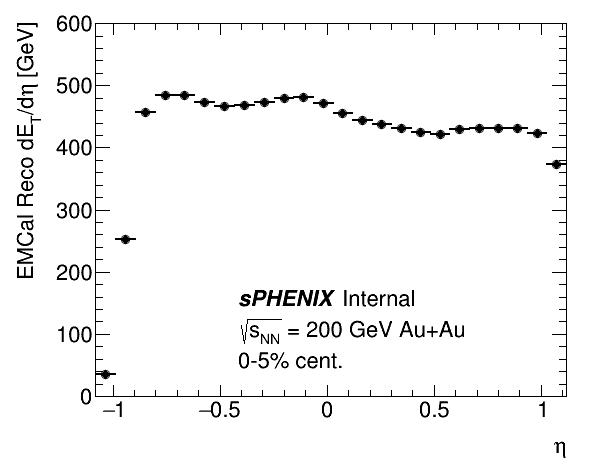

In [9]:
canvas = TCanvas("canvas","",600,500)
leg = ROOT.TLegend(.3,.6,.7,.89)
if cent == '0-5' or cent == '5-10':
    leg = ROOT.TLegend(.3,.2,.7,.4)
leg.AddEntry("","#it{#bf{sPHENIX}} Internal","")
leg.AddEntry("","#sqrt{s_{NN}} = 200 GeV Au+Au","")
leg.AddEntry("",f"{cent}% cent.","")
#leg.AddEntry(h_eT_data_emcal,"Data","lep")
#leg.AddEntry(h_eT_sim_emcal,"Reweighted Hijing","lep")
#leg.AddEntry(h_eT_epos_emcal,"Reweighted EPOS","lep")
#leg.AddEntry(h_eT_ampt_emcal,"Reweighted AMPT","lep")
leg.SetBorderSize(0)
h_eT_data_emcal.SetLineColor(1)
h_eT_sim_emcal.SetLineColor(2)
h_eT_ampt_emcal.SetLineColor(4)
h_eT_epos_emcal.SetLineColor(3)
h_eT_data_emcal.SetMarkerStyle(20)
h_eT_sim_emcal.SetMarkerStyle(8)
h_eT_sim_emcal.SetMarkerSize(0.7)
h_eT_sim_emcal.SetMarkerColor(2)
h_eT_ampt_emcal.SetMarkerStyle(8)
h_eT_ampt_emcal.SetMarkerSize(0.7)
h_eT_ampt_emcal.SetMarkerColor(4)
h_eT_epos_emcal.SetMarkerStyle(8)
h_eT_epos_emcal.SetMarkerSize(0.7)
h_eT_epos_emcal.SetMarkerColor(3)
h_eT_data_emcal.GetYaxis().SetRangeUser(0,600)
h_eT_data_emcal.SetStats(0)
h_eT_sim_emcal.SetStats(0)
h_eT_epos_emcal.SetStats(0)
h_eT_ampt_emcal.SetStats(0)
h_eT_data_emcal.SetYTitle("EMCal Reco dE_{T}/d#eta [GeV]")
h_eT_data_emcal.SetXTitle("#eta")
h_eT_data_emcal.Draw()
#h_eT_sim_emcal.Draw('same')
#h_eT_epos_emcal.Draw('same')
#h_eT_ampt_emcal.Draw('same')
leg.Draw()
canvas.Draw()
canvas.SaveAs('/sphenix/u/egm2153/spring_2024/detdeta_plots/emcal_uncorrected_'+cent+'.png')

Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas
Info in <TCanvas::Print>: png file /sphenix/u/egm2153/spring_2024/detdeta_plots/ihcal_uncorrected_0-5.png has been created


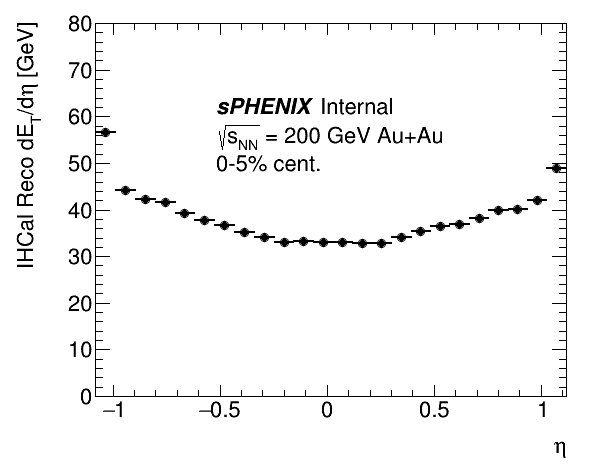

In [11]:
canvas = TCanvas("canvas","",600,500)
leg = ROOT.TLegend(.2,.62,.85,.8)
leg.AddEntry("","#it{#bf{sPHENIX}} Internal","")
leg.AddEntry("","#sqrt{s_{NN}} = 200 GeV Au+Au","")
leg.AddEntry("",f"{cent}% cent.","")
#leg.AddEntry(h_eT_data_ihcal,"Data","lep")
#leg.AddEntry(h_eT_sim_ihcal,"Reweighted Hijing","lep")
#leg.AddEntry(h_eT_epos_ihcal,"Reweighted EPOS","lep")
#leg.AddEntry(h_eT_ampt_ihcal,"Reweighted AMPT","lep")
leg.SetBorderSize(0)
h_eT_data_ihcal.SetStats(0)
h_eT_sim_ihcal.SetStats(0)
h_eT_epos_ihcal.SetStats(0)
h_eT_ampt_ihcal.SetStats(0)
h_eT_data_ihcal.SetYTitle("IHCal Reco dE_{T}/d#eta [GeV]")
h_eT_data_ihcal.SetXTitle("#eta")
h_eT_data_ihcal.GetXaxis().SetRangeUser(-1.05,1.1)
h_eT_sim_ihcal.GetXaxis().SetRangeUser(-1.05,1.1)
h_eT_epos_ihcal.GetXaxis().SetRangeUser(-1.05,1.1)
h_eT_ampt_ihcal.GetXaxis().SetRangeUser(-1.05,1.1)
h_eT_data_ihcal.GetYaxis().SetRangeUser(0,80)
h_eT_sim_ihcal.GetYaxis().SetRangeUser(0,80)
h_eT_epos_ihcal.GetYaxis().SetRangeUser(0,80)
h_eT_ampt_ihcal.GetYaxis().SetRangeUser(0,80)
h_eT_data_ihcal.SetLineColor(1)
h_eT_sim_ihcal.SetLineColor(2)
h_eT_epos_ihcal.SetLineColor(3)
h_eT_ampt_ihcal.SetLineColor(4)
h_eT_data_ihcal.SetMarkerStyle(20)
h_eT_sim_ihcal.SetMarkerStyle(8)
h_eT_sim_ihcal.SetMarkerSize(0.7)
h_eT_sim_ihcal.SetMarkerColor(2)
h_eT_ampt_ihcal.SetMarkerStyle(8)
h_eT_ampt_ihcal.SetMarkerSize(0.7)
h_eT_ampt_ihcal.SetMarkerColor(4)
h_eT_epos_ihcal.SetMarkerStyle(8)
h_eT_epos_ihcal.SetMarkerSize(0.7)
h_eT_epos_ihcal.SetMarkerColor(3)
h_eT_data_ihcal.Draw()
#h_eT_sim_ihcal.Draw('same')
#h_eT_epos_ihcal.Draw('same')
#h_eT_ampt_ihcal.Draw('same')
leg.Draw()
canvas.Draw()
canvas.SaveAs('/sphenix/u/egm2153/spring_2024/detdeta_plots/ihcal_uncorrected_'+cent+'.png')

Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas
Info in <TCanvas::Print>: png file /sphenix/u/egm2153/spring_2024/detdeta_plots/ohcal_uncorrected_0-5.png has been created


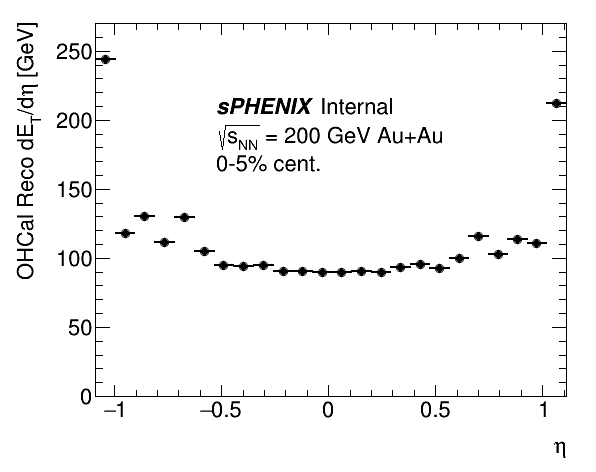

In [12]:
canvas = TCanvas("canvas","",600,500)
leg = ROOT.TLegend(.2,.62,.85,.8)
leg.AddEntry("","#it{#bf{sPHENIX}} Internal","")
leg.AddEntry("","#sqrt{s_{NN}} = 200 GeV Au+Au","")
leg.AddEntry("",f"{cent}% cent.","")
#leg.AddEntry(h_eT_data_ohcal,"Data","lep")
#leg.AddEntry(h_eT_sim_ohcal,"Reweighted Hijing","lep")
#leg.AddEntry(h_eT_epos_ohcal,"Reweighted EPOS","lep")
#leg.AddEntry(h_eT_ampt_ohcal,"Reweighted AMPT","lep")
leg.SetBorderSize(0)
h_eT_data_ohcal.SetStats(0)
h_eT_sim_ohcal.SetStats(0)
h_eT_epos_ohcal.SetStats(0)
h_eT_ampt_ohcal.SetStats(0)
h_eT_data_ohcal.SetYTitle("OHCal Reco dE_{T}/d#eta [GeV]")
h_eT_data_ohcal.SetXTitle("#eta")
h_eT_data_ohcal.GetYaxis().SetRangeUser(0,270)
h_eT_sim_ohcal.GetYaxis().SetRangeUser(0,270)
h_eT_epos_ohcal.GetXaxis().SetRangeUser(-1.05,1.1)
h_eT_epos_ohcal.GetYaxis().SetRangeUser(0,270)
h_eT_ampt_ohcal.GetYaxis().SetRangeUser(0,270)
h_eT_data_ohcal.GetXaxis().SetRangeUser(-1.05,1.1)
h_eT_sim_ohcal.GetXaxis().SetRangeUser(-1.05,1.1)
h_eT_ampt_ohcal.GetXaxis().SetRangeUser(-1.05,1.1)
h_eT_data_ohcal.SetLineColor(1)
h_eT_sim_ohcal.SetLineColor(2)
h_eT_epos_ohcal.SetLineColor(3)
h_eT_ampt_ohcal.SetLineColor(4)
h_eT_data_ohcal.SetMarkerStyle(20)
h_eT_sim_ohcal.SetMarkerStyle(8)
h_eT_sim_ohcal.SetMarkerSize(0.7)
h_eT_sim_ohcal.SetMarkerColor(2)
h_eT_ampt_ohcal.SetMarkerStyle(8)
h_eT_ampt_ohcal.SetMarkerSize(0.7)
h_eT_ampt_ohcal.SetMarkerColor(4)
h_eT_epos_ohcal.SetMarkerStyle(8)
h_eT_epos_ohcal.SetMarkerSize(0.7)
h_eT_epos_ohcal.SetMarkerColor(3)
h_eT_data_ohcal.Draw()
#h_eT_sim_ohcal.Draw('same')
#h_eT_epos_ohcal.Draw('same')
#h_eT_ampt_ohcal.Draw('same')
leg.Draw()
canvas.Draw()
canvas.SaveAs('/sphenix/u/egm2153/spring_2024/detdeta_plots/ohcal_uncorrected_'+cent+'.png')

Info in <TCanvas::Print>: png file /sphenix/u/egm2153/spring_2024/detdeta_plots/calo_uncorrected_0-5.png has been created


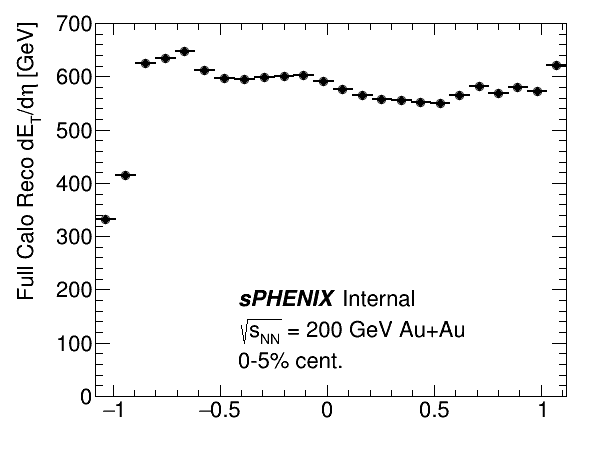

In [5]:
canvas = TCanvas("canvas","",600,500)
leg = ROOT.TLegend(.3,.6,.7,.89)
if cent == '0-5' or cent == '5-10':
    leg = ROOT.TLegend(.3,.2,.7,.4)
leg.AddEntry("","#it{#bf{sPHENIX}} Internal","")
leg.AddEntry("","#sqrt{s_{NN}} = 200 GeV Au+Au","")
leg.AddEntry("",f"{cent}% cent.","")
#leg.AddEntry(h_eT_data_emcal,"Data","lep")
#leg.AddEntry(h_eT_sim_emcal,"Reweighted Hijing","lep")
#leg.AddEntry(h_eT_epos_emcal,"Reweighted EPOS","lep")
#leg.AddEntry(h_eT_ampt_emcal,"Reweighted AMPT","lep")
leg.SetBorderSize(0)
h_eT_data_calo.SetLineColor(1)
h_eT_sim_emcal.SetLineColor(2)
h_eT_ampt_emcal.SetLineColor(4)
h_eT_epos_emcal.SetLineColor(3)
h_eT_data_calo.SetMarkerStyle(20)
h_eT_sim_emcal.SetMarkerStyle(8)
h_eT_sim_emcal.SetMarkerSize(0.7)
h_eT_sim_emcal.SetMarkerColor(2)
h_eT_ampt_emcal.SetMarkerStyle(8)
h_eT_ampt_emcal.SetMarkerSize(0.7)
h_eT_ampt_emcal.SetMarkerColor(4)
h_eT_epos_emcal.SetMarkerStyle(8)
h_eT_epos_emcal.SetMarkerSize(0.7)
h_eT_epos_emcal.SetMarkerColor(3)
h_eT_data_calo.GetYaxis().SetRangeUser(0,700)
h_eT_data_emcal.SetStats(0)
h_eT_sim_emcal.SetStats(0)
h_eT_epos_emcal.SetStats(0)
h_eT_ampt_emcal.SetStats(0)
h_eT_data_calo.SetYTitle("Full Calo Reco dE_{T}/d#eta [GeV]")
h_eT_data_emcal.SetXTitle("#eta")
h_eT_data_calo.Draw()
#h_eT_sim_emcal.Draw('same')
#h_eT_epos_emcal.Draw('same')
#h_eT_ampt_emcal.Draw('same')
leg.Draw()
canvas.Draw()
canvas.SaveAs('/sphenix/u/egm2153/spring_2024/detdeta_plots/calo_uncorrected_'+cent+'.png')

In [15]:
cents = ['0-5','5-10','10-20','20-30','30-40','40-50','50-60']
emcal_corr = []
ihcal_corr = []
ohcal_corr = []

for i, cent in enumerate(cents):
    infile = "MC/dETdeta_analysis_allruns_hijing_run14_nozs_mc_reweight_"+cent+"_reweight_hijing.root"
    f1 = ROOT.TFile.Open(infile)
    emcal_corr.append(TH1F(f1.Get("h_emcal_correction")))
    ihcal_corr.append(TH1F(f1.Get("h_ihcal_correction")))
    ohcal_corr.append(TH1F(f1.Get("h_ohcal_correction")))
    emcal_corr[i].SetDirectory(0)
    ihcal_corr[i].SetDirectory(0)
    ohcal_corr[i].SetDirectory(0)
    f1.Close()

In [16]:
emcal_mean = []
ihcal_mean = []
ohcal_mean = []
emcal_stat = []
ihcal_stat = []
ohcal_stat = []

for i in range(len(cents)):
    emcal_mean.append(0)
    ihcal_mean.append(0)
    ohcal_mean.append(0)
    emcal_stat.append(0)
    ihcal_stat.append(0)
    ohcal_stat.append(0)
    for j in range(7, 19):
        emcal_mean[i] += emcal_corr[i].GetBinContent(j)/12.0
        ihcal_mean[i] += ihcal_corr[i].GetBinContent(j)/12.0
        ohcal_mean[i] += ohcal_corr[i].GetBinContent(j)/12.0
        emcal_stat[i] += (emcal_corr[i].GetBinError(j)**2)/12.0
        ihcal_stat[i] += (ihcal_corr[i].GetBinError(j)**2)/12.0
        ohcal_stat[i] += (ohcal_corr[i].GetBinError(j)**2)/12.0
    emcal_stat[i] = np.sqrt(emcal_stat[i])
    ihcal_stat[i] = np.sqrt(ihcal_stat[i])
    ohcal_stat[i] = np.sqrt(ohcal_stat[i])
emm = array('f',emcal_mean)
ihm = array('f',ihcal_mean)
ohm = array('f',ohcal_mean)
eme = array('f',emcal_stat)
ihe = array('f',ihcal_stat)
ohe = array('f',ohcal_stat)
arrays = [emm, ohm, ihm]
errorarray = [eme, ohe, ihe]

Npart = [352,299,234,166,115,76,47]
half_npart = [176.0,149.5,117.0,83.0,57.5,38.0,23.5]
Npartarray = array('f', Npart)
Npart_error = [3,7,8,9,9,8,8]
Npart_error_array = array('f', Npart_error)

cent_mean = [2.5,7.5,15,25,35,45,55]
cent_error = [2.5,2.5,5,5,5,5,5]
centarray = array('f',cent_mean)
centerrorarray = array('f',cent_error)
print(emcal_mean)
print(emcal_stat)
print(ihcal_mean)
print(ohcal_mean)

[0.6662336389223733, 0.658951312303543, 0.6489203323920568, 0.659195656577746, 0.672993540763855, 0.6804526895284653, 0.6880904883146286]
[0.0018013759515985552, 0.0012534294996990034, 0.0010480586907360282, 0.0013106127470593378, 0.0016397944228098192, 0.002052393579504511, 0.00265559737789093]
[0.0454057917619745, 0.0452950190131863, 0.04514941324790319, 0.044916355051100254, 0.044692439337571464, 0.044222491793334484, 0.04381570313125848]
[0.13877103477716446, 0.1391879357397556, 0.14006401101748148, 0.1403493583202362, 0.13994664326310158, 0.13888102769851685, 0.13785838335752484]


Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas
Info in <TCanvas::Print>: png file /sphenix/u/egm2153/spring_2024/detdeta_plots/calo_subsystem_reco_truth_centbins.png has been created
Info in <TCanvas::Print>: pdf file /sphenix/u/egm2153/spring_2024/detdeta_plots/calo_subsystem_reco_truth_centbins.pdf has been created


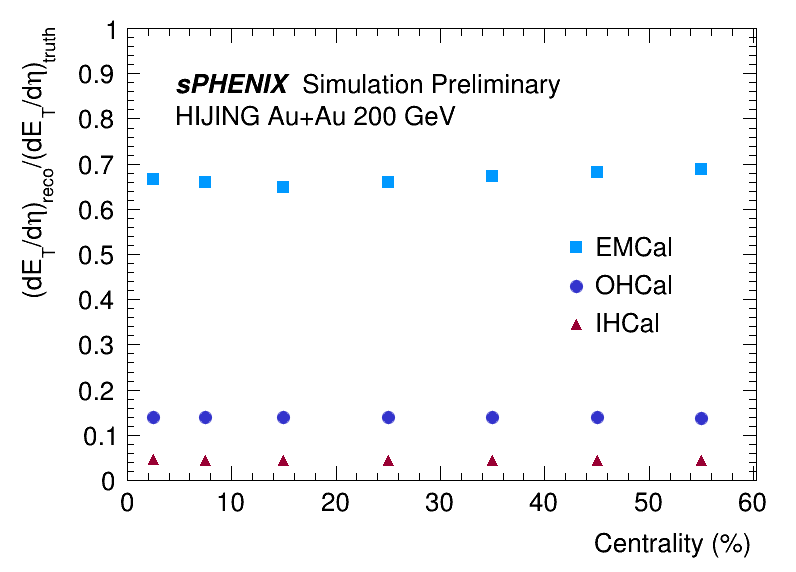

In [18]:
# Create a canvas
canvas = ROOT.TCanvas("canvas", "Graphs", 800, 600)
leg_tags = ['EMCal','OHCal','IHCal']

# Create and plot TGraphs for each array
graphs = []
colors = [ROOT.kAzure+7, ROOT.kBlue-3, ROOT.kPink-6] #, ROOT.kCyan, ROOT.kMagenta, ROOT.kYellow, ROOT.kBlack, ROOT.kGray]
error_colors = [ROOT.kCyan-10, ROOT.kBlue-10, ROOT.kRed-10]
shapes = [ROOT.kFullSquare, ROOT.kFullCircle, 22]
for i, arr in enumerate(arrays):
    #graphs.append(ROOT.TGraphErrors(7, Npartarray, arr, Npart_error_array, errorarray[i]))
    graphs.append(ROOT.TGraphErrors(7, centarray, arr, 0, errorarray[i]))
    
    graphs[i].SetMarkerStyle(shapes[i])
    graphs[i].SetLineColor(colors[i])
    graphs[i].SetMarkerColor(colors[i])
    graphs[i].GetYaxis().SetRangeUser(0,1)
    graphs[i].SetMarkerSize(1.5)
    if i == 0:
        graphs[i].GetYaxis().SetTitle("(dE_{T}/d#eta)_{reco}/(dE_{T}/d#eta)_{truth}")
        #graphs[i].GetXaxis().SetTitle("<N_{part}>")
        graphs[i].GetXaxis().SetTitle("Centrality (%)")
        graphs[i].Draw("AP")
    else:
        graphs[i].Draw("P,same")

# Set the legend
legend = ROOT.TLegend(0.7, 0.4, 0.89, 0.6)
legend.SetBorderSize(0)
legend.SetTextSize(0.05)
for i, graph in enumerate(graphs):
    legend.AddEntry(graph,leg_tags[i], "p")
legend.Draw()

text = ROOT.TLatex()
text.SetTextSize(0.05)
text.SetTextAlign(12)  # Center alignment
text.SetTextColor(ROOT.kBlack)
text.DrawLatexNDC(0.22, 0.85, "#it{#bf{sPHENIX}} Simulation Preliminary")

text2 = ROOT.TLatex()
text2.SetTextSize(0.05)
text2.SetTextAlign(12)  # Center alignment
text2.SetTextColor(ROOT.kBlack)
text2.DrawLatexNDC(0.22, 0.8, "HIJING Au+Au 200 GeV")

# Draw the canvas
canvas.Draw()
canvas.SaveAs("/sphenix/u/egm2153/spring_2024/detdeta_plots/calo_subsystem_reco_truth_centbins.png")
canvas.SaveAs("/sphenix/u/egm2153/spring_2024/detdeta_plots/calo_subsystem_reco_truth_centbins.pdf")